# Using CNNs for Handwriting Recognition - MNIST 

The objective is to use the MNIST data set again and a CNN, which is better suited for image processing.

# Import data, keras, and tensorflow

In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

# Load up as train/test data

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

# Data format
The data will be 2D images of 28x28 pixels instead of a flattened stream of 784 pixels. Depending on the data format Keras is set up for, this may be 1x28x28 or 28x28x1. Luckly, there is a method for finding that and reshape the data the way it needs

In [4]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# Change data type and normalize it

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

# One hot labels

In [11]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

# Checking a sample

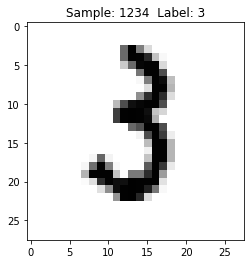

In [13]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'));
    plt.show()
    
display_sample(1234)

# The CNN

A CNN involves more layers. They are not strictly necessary (pooling and dropout), but helps to avoid overfitting and running faster.

- First 2D convolution of the image - 32 windows of each image, 3x3 in size
- Second 2D with 64 windows of 3x3. This topology is recommended within Keras's examples. It is advisable to re-use previous research whenever possible while tuning CNN's, as it is hard to do.
- Next is a MaxPooling2D layer that takes the maximum of each 2x2 result to distill the results down into something more manageable.
- A dropout filter is applied to prevent overfitting.
- Next the 2D layer is flattened into a 1D layer.

At this point it is the same problem a conventional neural network:

- Feed that into a hidden, flat layer of 128 units.
- Dropout again to further prevent overfitting.
- Finally, final layer with 10 units where softmax is applied to choose our category of 0-9.

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

# Model description

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

# Loss function
Still a multiple categorization, so categorical_crossentropy is still the right loss function to use

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model

### This could take hours to run, and the CPU will be maxed out during that time. Don't run the next block unless you can tie up your computer for a long time. It will print progress as each epoch is run, but each epoch can take around 20 minutes.

In [17]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 - 103s - loss: 0.1875 - accuracy: 0.9438 - val_loss: 0.0444 - val_accuracy: 0.9858
Epoch 2/10
1875/1875 - 103s - loss: 0.0787 - accuracy: 0.9766 - val_loss: 0.0330 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 - 102s - loss: 0.0598 - accuracy: 0.9825 - val_loss: 0.0335 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 - 102s - loss: 0.0490 - accuracy: 0.9852 - val_loss: 0.0313 - val_accuracy: 0.9889
Epoch 5/10
1875/1875 - 103s - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0320 - val_accuracy: 0.9896
Epoch 6/10
1875/1875 - 113s - loss: 0.0353 - accuracy: 0.9891 - val_loss: 0.0342 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 - 109s - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0320 - val_accuracy: 0.9905
Epoch 8/10
1875/1875 - 107s - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0370 - val_accuracy: 0.9910
Epoch 9/10
1875/1875 - 112s - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0291 - val_accuracy: 0.9918
Epoch 10/10
1875/1875 - 110s - loss: 0.0228 - accuracy: 0.9926 -

# Results

In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.032842304557561874
Test accuracy: 0.9915000200271606


Only 10 epochs and 99.2%, DAMN! Good stuff